## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Locates data files
mouse_metadata_path = "pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "pymaceuticals/data/Study_results.csv"

# Reads the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combines the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Displays the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checks the number of mice.
mice = study_data_complete["Mouse ID"].value_counts()
numMice = len(mice)

# Prints number of mice in dataset
print (numMice)

249


In [3]:
# Gets the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
miceDup = study_data_complete["Mouse ID"].value_counts()
miceDupDF = pd.DataFrame({"Count of Mouse ID": miceDup}).head()

#prints number of instances of each Mouse ID
miceDupDF

,Count of Mouse ID
g989,13
s185,10
y769,10
l733,10
k403,10


In [4]:
# Gets all the data for the duplicate mouse ID "g989" 
# sets the index to the mouse ID
indexDF = study_data_complete.set_index("Mouse ID")

# Checks the mouse data for ID
indexDF.loc["g989"]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Creates a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = indexDF.drop(["g989"])
cleanMiceDF = cleanDF.reset_index()

# Prints clean dataset / duplicate was removed
cleanMiceDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checks the number of mice in the clean DataFrame
cleanMice = cleanMiceDF["Mouse ID"].value_counts()
numCleanMice = len(cleanMice)

# Prints number of mice in cleaned data / duplicate was removed
print (numCleanMice)

248


## Summary Statistics

In [7]:
# Generates a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# series variable to hold Tumor Volume Data grouped by Drug Regimen
tumRegimen = cleanDF.groupby(["Drug Regimen"])

# variable to hold the Mean Tumor Volume Data
meanTumVol = tumRegimen["Tumor Volume (mm3)"].mean()

# variable to hold median Tumor Volume Data
medTumVol = tumRegimen["Tumor Volume (mm3)"].median()

# variable to hold the Tumor Volume Variance Data
varTumVol = tumRegimen["Tumor Volume (mm3)"].var()

# variable to hold the Tumor Volume Standard Deviation Data
stdTumVol = tumRegimen["Tumor Volume (mm3)"].std()

# variable to hold the Tumor Volume SEM Data
semTumVol = tumRegimen["Tumor Volume (mm3)"].sem()


# Convert to DataFrame
tumRegimenDF = pd.DataFrame({
    "Mean Tumor Volume": meanTumVol,
    "Median Tumor Volume": medTumVol,
    "Tumor Volume Variance": varTumVol,
    "Tumor Volume StdDev": stdTumVol,
    "Tumor Volume SEM": semTumVol
})

# prints summary statistics table of data grouped by Druug Regimen
tumRegimenDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume StdDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generates a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Uses the aggregation method to produce the same summary statistics in a single line
tumRegimenAGG = cleanDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumRegimenAGG

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [38]:
# Generates a bar plot showing the total number of measurements taken on each drug regimen
cleanMiceDF

# list of unique drug regimens


# drug regimen as x-axis values for plotting

# drop all duplicate mice


# get mice counts per drug
measurementsCount = cleanMiceDF.(["Drug Regimen"]).count()
#measurementsCountDF = pd.Dataframe(measurementsCount)
measurementsCount

SyntaxError: invalid syntax (<ipython-input-38-19103ffcc0ef>, line 13)

<AxesSubplot:xlabel='Drug Regimen'>

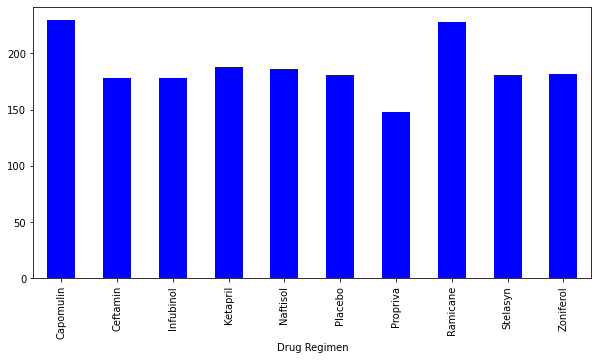

In [14]:
# plot the mouse counts for each drug using pandas
measurementsBar = cleanMiceDF.groupby(["Drug Regimen"])["Timepoint"].count()
measurementsBar.plot.bar(figsize=(10,5), color="b", fontsize=10)

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen


In [ ]:
# Generates a pie plot showing the distribution of female versus male mice using pandas
gender = cleanMiceDF.groupby(["Sex"])["Sex"].count()

#plots pie chart using pandas
gender.plot.pie(startangle=185, autopct="%1.1f%%", figsize=(5, 5))

In [ ]:
# Generates a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=("female", "male"), startangle=185, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin


# isolated view of just capomulin for later use


# Reset index so drug regimen column persists after inner merge


# get mouse count per drug


# Start by getting the last (greatest) timepoint for each mouse


In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# show all rows of data


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
 

In [ ]:
# Determine outliers using upper and lower bounds


In [ ]:
# add subset 


# tumor volumes for each Drug Regimen


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest




## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#change index to mouse ID 

#remove other mouse IDs so only s185 shows


#set the x-axis equal to the Timepoint and y-axis to Tumor Volume


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume


# establish x-axis value for the weight of the mice


# produce scatter plot of the data


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data
